In [2]:
import pandas as pd

df = pd.read_excel('/Base_SANA.xlsx',sheet_name='Hoja1')

df.head()

,Anio,Mes,Cod. Cliente,Razon Social,Nombre de Fantasia,Fecha Alta Cliente,Año alta,C.U.I.T,Canal,Desc.Canal,...,Desc. Prov.,Cod. Postal,Ventas,Bonifi,Promo,Atenc,Cajas Entregadas,Factu1,Factu2,Botellas entregadas
0,2023,6,119,ZAPPACOSTA HORACIO NICOLAS,ZAPPACOSTA HORACIO NICOLAS,07/04/11,2011,20-08250378-2,2,RESTAURANT,...,GBA,1642,3.0,0,0.0,0.0,3.0,18738.00,18738.00,18.0
1,2023,7,395,PROA DE BUENOS AIRES SA,I CENTRAL MARKET,14/04/11,2011,30-70494727-1,2,RESTAURANT,...,CABA,1033,1.0,0,0.0,0.0,1.0,18180.00,18180.00,1.0
2,2023,1,395,PROA DE BUENOS AIRES SA,I CENTRAL MARKET,14/04/11,2011,30-70494727-1,2,RESTAURANT,...,CABA,1033,1.0,0,0.0,0.0,1.0,6420.00,6420.00,6.0
3,2023,10,76,GREEN BAMBOO,GREEN BAMBOO,01/04/11,2011,30-71092709-6,2,RESTAURANT,...,CABA,1420,1.0,0,0.0,0.0,1.0,166.61,166.61,6.0
4,2023,4,76,GREEN BAMBOO,GREEN BAMBOO,01/04/11,2011,30-71092709-6,2,RESTAURANT,...,CABA,1420,1.0,0,1.0,0.0,2.0,55476.00,18492.00,12.0


Las variables potencialmente interesantes son: Anio, mes, razon social,desc.canal, nombre,desc.familiar,desc.linea, y botellas entregadas. ¿Cuál es el precio promedio y la variabilidad de precios (desviación estándar) de las diferentes categorías de vinos de Catena Zapata (ej. Malbec vs. Blend vs. Cabernet Sauvignon)? ¿Existe un tipo de vino que represente el segmento premium con mayor claridad?

In [4]:
import pandas as pd
import numpy as np
df = pd.read_excel("/Base_SANA.xlsx")
len(df)

94511

In [5]:
df = pd.read_excel('/Base_SANA.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94511 entries, 0 to 94510
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Anio                 94511 non-null  int64  
 1   Mes                  94511 non-null  int64  
 2   Cod. Cliente         94511 non-null  int64  
 3   Razon Social         94511 non-null  object 
 4   Nombre de Fantasia   94511 non-null  object 
 5   Fecha Alta Cliente   94511 non-null  object 
 6   Año alta             94511 non-null  int64  
 7   C.U.I.T              94511 non-null  object 
 8   Canal                94511 non-null  object 
 9   Desc.Canal           94511 non-null  object 
 10  Vendedor             94511 non-null  int64  
 11  Nombre               94511 non-null  object 
 12  Cod.Zona Geog.       94511 non-null  int64  
 13  Desc. Zona Geog.     94511 non-null  object 
 14  Orden FLI            94511 non-null  int64  
 15  Cod.Familia          94511 non-null 

In [6]:
df.describe().round(1)

,Anio,Mes,Cod. Cliente,Año alta,Vendedor,Cod.Zona Geog.,Orden FLI,Orden Linea,Botellas x caja,Cod. Prov.,Cod. Postal,Ventas,Bonifi,Promo,Atenc,Cajas Entregadas,Factu1,Factu2,Botellas entregadas
count,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0,94511.0
mean,2023.8,6.4,4914.1,2018.5,12.4,3.9,2618.4,6968.0,5.7,4.7,2885.1,6.0,0.0,0.5,0.0,6.5,210109.4,180981.2,37.5
std,0.8,3.4,7942.8,4.2,6.7,7.1,1489.8,3023.6,1.2,6.2,2587.0,56.6,0.0,9.1,0.1,57.4,2447903.7,2432457.4,340.1
min,2023.0,1.0,8.0,2011.0,0.0,0.0,0.0,101.0,0.0,1.0,0.0,-740.0,0.0,-20.0,0.0,-740.0,-84345068.6,-84345068.6,-4440.0
25%,2023.0,4.0,1777.0,2015.0,8.0,0.0,1201.0,6518.0,6.0,1.0,1414.0,1.0,0.0,0.0,0.0,1.0,24099.2,13307.0,6.0
50%,2024.0,6.0,3184.0,2019.0,11.0,0.0,3000.0,8669.0,6.0,2.0,1602.0,2.0,0.0,0.0,0.0,2.0,59503.5,43638.0,12.0
75%,2024.0,9.0,4091.0,2022.0,16.0,1.0,4101.0,9002.0,6.0,5.0,5000.0,4.0,0.0,0.0,0.0,4.0,138843.0,109710.0,24.0
max,2025.0,12.0,100001.0,2025.0,27.0,18.0,5500.0,12030.0,15.0,24.0,9420.0,5374.0,0.0,2580.0,15.0,5374.0,314368681.9,314368681.9,32244.0


In [11]:
df.Nombre.unique()

array(['GONZALO MAGARIяS', 'MATIAS FRIDMANIS', 'JUAN BAUTISTA ARRAMBIDE',
       'GERENCIA', 'TURISMO MENDOZA', 'ALVARO BAFFICO', 'JOAQUIN SASTRE',
       'URIEL MORENO', 'MARTIN ARHANCET', 'PATRICIO CENTANIN',
       'CRISTIAN PALET', 'INDALECIO LOZA', 'EMILIO MONTERO',
       'GERMAN CELIS', 'CAMILO GAITTO', 'VINICIUS MACIEL', 'SUELEM ALVES',
       'MARTIN ZORREGUIETA', 'FEDERICO NOVELLI', 'LUCAS BRUSA',
       'ADRIAN MARIO BRESCIA', 'GERENCIA 2', 'SANTIAGO COLLINET',
       'LUCIO BUOTTAFOCCO', 'MAURICIO FLOREZ', 'TURISMO VISTA FLORES',
       'E-COMMERCE', 'IGNACIO CAREAGA'], dtype=object)

In [18]:
df['Desc.Familia'].unique()

array(['PADRILLOS', 'ANIMAL', 'RADICAL IMAGINATION PROJECT', 'ALMA NEGRA',
       'CHE.VINS', 'SIESTA', 'STELLA CRINITA', 'TIKAL', 'MARA',
       'WINE IS ART', 'TURISMO', "L'ORANGE", 'MATERIAL POP', 'MASI',
       'VARIOS', 'SELECCION PREMIUM'], dtype=object)

In [19]:
df['C.U.I.T'].unique()

array(['20-08250378-2', '30-70494727-1', '30-71092709-6', ...,
       '30-71637811-6', '27-25837987-5', '20-07728792-3'], dtype=object)

In [21]:
df['Desc. Linea'].unique()

array(['PADRILLOS MALBEC', 'PADRILLOS MALBEC BAG IN BOX',
       'ANIMAL MALBEC ORGANICO', 'SIMBIOSIS PET NAT SYRAH',
       'ALMA NEGRA TINTO', 'ALMA NEGRA ORANGE',
       'JARDIN ENCHANTE ESPUMANTE', 'ALMA NEGRA BLANCO',
       'BIO SIESTA MALBEC', 'STELLA CRINITA PETIT VERDOT', 'TIKAL JUBILO',
       'TIKAL CORAZON', 'ON THE ROAD PINOT', 'MARA PINOT NOIR',
       'ALMA NEGRA BRUT NATURE', 'ALMA NEGRA BLANC DE BLANCS',
       'MARA SEMILLON', 'JARDIN ENCHANTE ROSADO 750', 'AMICI MIEI',
       'MARA CABERNET FRANK', 'GRAN ALMA NEGRA', 'ANIMAL CHARDONNAY',
       'ANIMAL BAG IN BOX', 'ANIMAL EXTRA BRUT', 'PADRILLOS PINOT NOIR',
       'ANIMAL BLEND DE TINTOS', 'ANIMAL TORRONTES', 'SIESTA ADOBE',
       'OMAGGIO CABERNET FRANC', 'MARA PETIT VERDOT',
       'ANIMAL CABERNET SAU ORGANICO', 'ANIMAL BLEND DE BLANCAS',
       'TIKAL NATURAL TINTO', 'PADRILLOS CAJA CON CUCHILLO',
       'MARA MERLOT', 'TIKAL AMORIO', 'ESTUCHE ALMA NEGRA BLEND',
       'TATU CRIOLLA', 'ALMA NEGRA 500', 'WIA CH

In [23]:
df['Cod. Postal'].unique()

array([1642, 1033, 1420, 1013, 3610, 3300, 5500, 1101, 1900, 5000, 1045,
       7600, 7500, 8370, 2322, 7630,    0, 3100, 3280, 7000, 1065, 1419,
       1822, 3000, 2000, 1879, 8000, 1414, 8500,  176, 1425, 1055, 1112,
       1814, 1012, 1640, 9120, 1107, 8400, 1424, 1684, 2629, 1079, 3366,
       1704, 2804, 1842, 3200, 2200, 6300, 1028, 3370, 7111, 1011, 3016,
       1754, 6360, 3260, 1678, 1702, 6500, 8332, 7300, 1426, 5505, 1638,
       1114, 9405, 1270, 9001, 1129, 1119, 1006, 1007, 1075, 1002, 1253,
       1650, 9200, 8407, 8401, 1607, 1635, 7220, 1152, 1094, 9100, 1611,
       1428, 3336, 1885, 9410, 1826, 4700, 8316, 1417, 6070, 1646, 1408,
       8324, 1427, 9400, 2760, 1886, 1636, 7406, 5600, 1429, 3230, 1060,
       1623, 5021, 1440, 1708, 7167, 5105, 1676, 1115, 2820, 3364, 5001,
       1038, 8430, 1405, 1058, 9420, 1629, 8300, 1714, 1712, 1846, 7165,
       1431, 3153, 9000, 1613, 6700, 2400, 1870, 5186, 1832, 7530, 1102,
       7108, 1609, 1416, 1602, 1066, 1834, 8504, 18

In [22]:
df['Localidad'].unique()

array(['SAN ISIDRO', 'CAPITAL FEDERAL', 'CABA', 'TALCAHUANO', 'FORMOSA',
       'POSADAS', 'MENDOZA CIUDAD', 'C. A. B. A.', 'LA PLATA',
       'BARRIO GENERAL PAZ N', 'C.A.B.A.', 'MAR DEL PLATA',
       'TRES ARROYOS', 'MAR DEL PLATA NORTE', 'SAN MARTIN DE LOS ANDRES',
       'RAFAELA', 'NECOCHEA', 'NORDELTA, BENAVIDEZ,', 'PARANA', 'COLON',
       'TANDIL', 'OLIVOS, VICENTE LOPEZ', 'VALENTIN ALSINA', 'SANTA FE',
       'GRAL PACHECO', 'ROSARIO NORTE', 'QUILMES OESTE', 'BAHIA BLANCA',
       'VIEDMA', 'HAEDO', 'CAP.FED.', 'CAѕELAS', 'QUILMES', 'MARTINEZ',
       'PUERTO MADRYN', 'BARRIO: PUERTO MADERO',
       'SAN CARLOS DE BARILOCHE', 'IGUAZU', 'MUNRO', 'BARRIO: NUхZ',
       'BARRIO: PALERMO', 'USHUAIA', 'CDAD. JARDIN LOMAS D',
       'TOLOSA. LA PLATA', '1', 'PILAR', 'CORDOBA',
       'PCIA. CARDALES BS AS', 'BERNARDO DE IRIGOYEN',
       'PROVINCIA DE BS.AS.', 'CAMPANA', 'SAN MARTIN DE LOS ANDES',
       'MONTE GRANDE', 'CONCORDIA', 'BARRIO: MONSERRAT', 'SAN LORENZO',
       'LOS C

✅ Dataset cargado correctamente desde Base_SANA.xlsx.

--- Resultados del Análisis ---
Total Cajas Entregadas: 615,213
Total Cajas Vendidas (con cargo): 564,393
Total Cajas Sin Cargo (la diferencia): 50,820
**Porcentaje de Ventas Sin Cargo: 8.26%**

**Resultado de la Hipótesis:** ❌ HIPÓTESIS RECHAZADA: 8.26% NO supera el 20%.


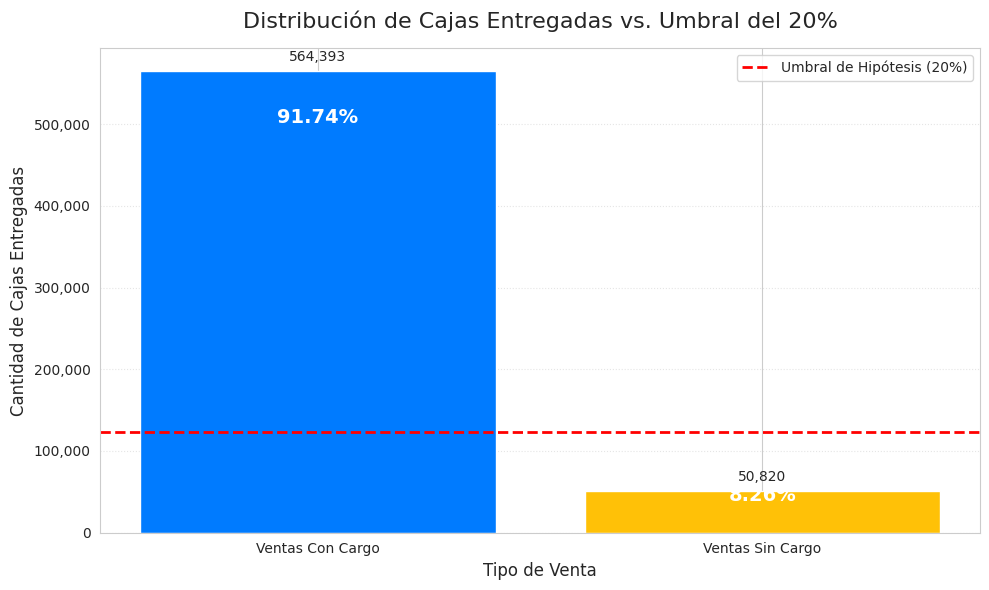

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Matplotlib
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
UMBRAL_HIPOTESIS = 20.0 # Umbral de la hipótesis

try:
    df = pd.read_excel('/Base_SANA.xlsx', sheet_name='Hoja1')
    print("✅ Dataset cargado correctamente desde Base_SANA.xlsx.")


except ValueError:
    print("❌ ERROR: La hoja 'Hoja1' no se encontró en el archivo Excel.")
    df = pd.DataFrame({'Ventas': [0], 'Cajas Entregadas': [0]})

if 'Ventas' in df.columns and 'Cajas Entregadas' in df.columns:
    df['Ventas'] = pd.to_numeric(df['Ventas'], errors='coerce').fillna(0)
    df['Cajas Entregadas'] = pd.to_numeric(df['Cajas Entregadas'], errors='coerce').fillna(0)


    total_ventas_con_cargo = df['Ventas'].sum()
    total_cajas_entregadas = df['Cajas Entregadas'].sum()


total_ventas_sin_cargo = total_cajas_entregadas - total_ventas_con_cargo


if total_cajas_entregadas > 0:
    porcentaje_sin_cargo = (total_ventas_sin_cargo / total_cajas_entregadas) * 100
else:
    porcentaje_sin_cargo = 0
    print("⚠️ Advertencia: El total de cajas entregadas es cero.")

print("\n--- Resultados del Análisis ---")
print(f"Total Cajas Entregadas: {total_cajas_entregadas:,.0f}")
print(f"Total Cajas Vendidas (con cargo): {total_ventas_con_cargo:,.0f}")
print(f"Total Cajas Sin Cargo (la diferencia): {total_ventas_sin_cargo:,.0f}")
print(f"**Porcentaje de Ventas Sin Cargo: {porcentaje_sin_cargo:.2f}%**")

if porcentaje_sin_cargo > UMBRAL_HIPOTESIS:
    evaluacion = f"✅ HIPÓTESIS CONFIRMADA: {porcentaje_sin_cargo:.2f}% SÍ supera el {UMBRAL_HIPOTESIS:.0f}%."
    color_vsc = '#DC3545' # Rojo, superó el umbral
else:
    evaluacion = f"❌ HIPÓTESIS RECHAZADA: {porcentaje_sin_cargo:.2f}% NO supera el {UMBRAL_HIPOTESIS:.0f}%."
    color_vsc = '#FFC107' # Amarillo, no se cumplió

print(f"\n**Resultado de la Hipótesis:** {evaluacion}")

data_grafico = pd.DataFrame({
    'Tipo de Venta': ['Ventas Con Cargo', 'Ventas Sin Cargo'],
    'Cajas Totales': [total_ventas_con_cargo, total_ventas_sin_cargo],
    'Porcentaje': [100 - porcentaje_sin_cargo, porcentaje_sin_cargo]
})

plt.figure(figsize=(10, 6))
bars = plt.bar(
    data_grafico['Tipo de Venta'],
    data_grafico['Cajas Totales'],
    color=['#007BFF', color_vsc]
)


umbral_cajas = total_cajas_entregadas * (UMBRAL_HIPOTESIS / 100)
plt.axhline(umbral_cajas, color='red', linestyle='--', linewidth=2, label=f'Umbral de Hipótesis ({UMBRAL_HIPOTESIS:.0f}%)')


for i, bar in enumerate(bars):
    yval = bar.get_height()

    plt.text(bar.get_x() + bar.get_width()/2, yval - (yval * 0.1),
             f'{data_grafico["Porcentaje"].iloc[i]:.2f}%',
             ha='center', va='center', color='white', fontweight='bold', fontsize=14)

    plt.text(bar.get_x() + bar.get_width()/2, yval + (total_cajas_entregadas * 0.015),
             f'{yval:,.0f}',
             ha='center', va='bottom', fontsize=10)


def format_millions(x, pos):
    return f'{x:,.0f}'
formatter = plt.FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Distribución de Cajas Entregadas vs. Umbral del 20%', fontsize=16, pad=15)
plt.ylabel('Cantidad de Cajas Entregadas', fontsize=12)
plt.xlabel('Tipo de Venta', fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

✅ Dataset cargado correctamente.


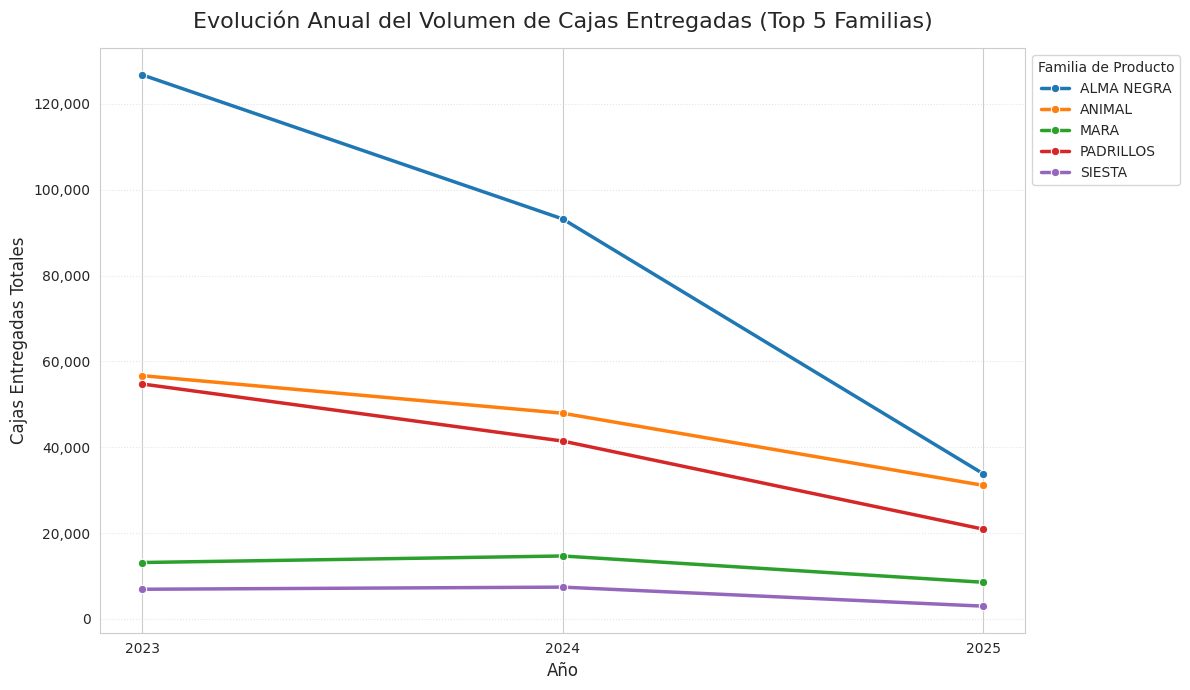

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Matplotlib
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# --- 1. Carga del Dataset (Usando tu método preferido) ---
try:
    # Asume que 'Base_SANA.xlsx' está subido
    df = pd.read_excel('/Base_SANA.xlsx', sheet_name='Hoja1')
    print("✅ Dataset cargado correctamente.")

except Exception as e:
    print(f"❌ ERROR: Fallo al cargar el archivo. Asegúrate de que 'Base_SANA.xlsx' esté subido. Error: {e}")


# --- 2. Limpieza y Agregación de Datos ---

# Asegurar que las columnas clave sean del tipo correcto
df['Anio'] = pd.to_numeric(df['Anio'], errors='coerce').fillna(0).astype(int)
df['Cajas Entregadas'] = pd.to_numeric(df['Cajas Entregadas'], errors='coerce').fillna(0)

# Filtrar años con valor 0 o años incompletos/futuros si es necesario (e.g., solo años > 2020)
df = df[df['Anio'] > df['Anio'].max() - 4] # Filtra los últimos 4 años completos

# Agrupar por Año y Familia para obtener el volumen anual
df_familia_anual = df.groupby(['Anio', 'Desc.Familia'])['Cajas Entregadas'].sum().reset_index()

# Identificar las top 5 familias históricas para enfocarnos en las líderes
top_familias = df_familia_anual.groupby('Desc.Familia')['Cajas Entregadas'].sum().nlargest(5).index.tolist()

# Filtrar el DataFrame solo con las familias más importantes
df_top_5 = df_familia_anual[df_familia_anual['Desc.Familia'].isin(top_familias)]

# --- 3. Generación de la Visualización (Gráfico de Líneas) ---

# Crear el gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_top_5,
    x='Anio',
    y='Cajas Entregadas',
    hue='Desc.Familia',
    marker='o',
    linewidth=2.5
)

# Añadir títulos y etiquetas
plt.title(f'Evolución Anual del Volumen de Cajas Entregadas (Top {len(top_familias)} Familias)', fontsize=16, pad=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cajas Entregadas Totales', fontsize=12)

# Formato del eje Y para mostrar valores en miles
def format_millions(x, pos):
    return f'{x:,.0f}'
formatter = plt.FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(formatter)

# Formato del eje X para que los años sean enteros
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Mostrar la leyenda y la cuadrícula
plt.legend(title='Familia de Producto', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()

plt.show()

# --- Fin del Código ---

✅ Dataset cargado correctamente.


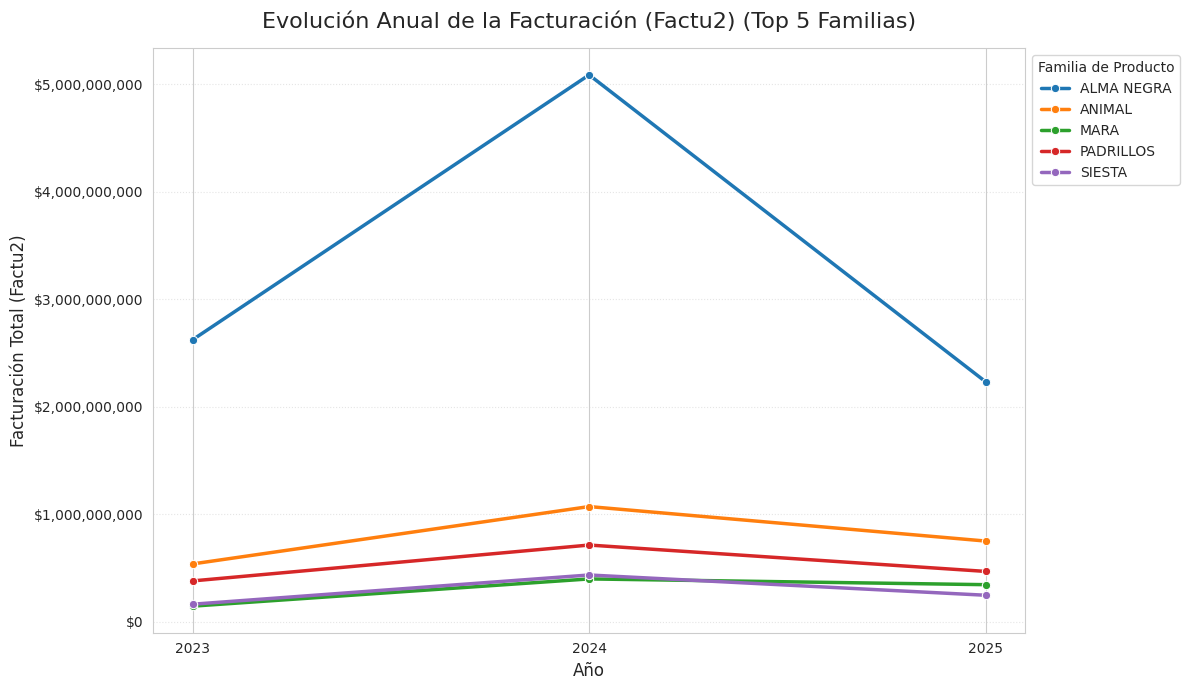

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Matplotlib
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# --- 1. Carga del Dataset ---
try:
    # Asume que 'Base_SANA.xlsx' está subido
    df = pd.read_excel('/Base_SANA.xlsx', sheet_name='Hoja1')
    print("✅ Dataset cargado correctamente.")

except Exception as e:
    print(f"❌ ERROR: Fallo al cargar el archivo. Asegúrate de que 'Base_SANA.xlsx' esté subido. Error: {e}")

# --- 2. Limpieza y Agregación de Datos ---

# Asegurar que las columnas clave sean del tipo correcto
df['Anio'] = pd.to_numeric(df['Anio'], errors='coerce').fillna(0).astype(int)
# CAMBIO CLAVE: Usamos 'Factu2' y la convertimos a numérico
df['Factu2'] = pd.to_numeric(df['Factu2'], errors='coerce').fillna(0)

# Filtrar años con valor 0 o años incompletos/futuros si es necesario (e.g., solo años > 2020)
df = df[df['Anio'] > df['Anio'].max() - 4]

# Agrupar por Año y Familia para obtener la facturación anual
df_familia_anual = df.groupby(['Anio', 'Desc.Familia'])['Factu2'].sum().reset_index()

# Identificar las top 5 familias históricas según el valor Facturado
top_familias = df_familia_anual.groupby('Desc.Familia')['Factu2'].sum().nlargest(5).index.tolist()

# Filtrar el DataFrame solo con las familias más importantes
df_top_5 = df_familia_anual[df_familia_anual['Desc.Familia'].isin(top_familias)]

# --- 3. Generación de la Visualización (Gráfico de Líneas) ---

# Crear el gráfico
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_top_5,
    x='Anio',
    y='Factu2', # CAMBIO CLAVE: Eje Y es Factu2
    hue='Desc.Familia',
    marker='o',
    linewidth=2.5
)

# Añadir títulos y etiquetas
plt.title(f'Evolución Anual de la Facturación (Factu2) (Top {len(top_familias)} Familias)', fontsize=16, pad=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Facturación Total (Factu2)', fontsize=12)

# Formato del eje Y para mostrar valores con separadores de miles y el signo de moneda (opcional, ajusta si es necesario)
def format_currency(x, pos):
    return f'${x:,.0f}'
formatter = plt.FuncFormatter(format_currency)
plt.gca().yaxis.set_major_formatter(formatter)

# Formato del eje X para que los años sean enteros
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Mostrar la leyenda y la cuadrícula
plt.legend(title='Familia de Producto', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()

plt.show()

# --- Fin del Código ---